## Data Importing

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv")
# rawdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv")

<ipython-input-67-f63e02ecfaed>:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv")


In [ ]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Name,Off-Road Description,Municipality,...,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location
0,DM8479000T,210020119,Takoma Park Police Depart,Property Damage Crash,05/27/2021 07:40:00 PM,NaN,NaN,NaN,IN PARKING LOT,NaN,...,NaN,0,No,Yes,2017,HINO,TWK,38.987657,-76.987545,"(38.98765667, -76.987545)"
1,MCP2970000R,15045937,MONTGOMERY,Property Damage Crash,09/11/2015 01:29:00 PM,NaN,NaN,NaN,Parking Lot: \n2525 Ennalls Ave,NaN,...,South,5,No,No,2012,TOYOTA,SU,39.039917,-77.053649,"(39.03991652, -77.05364898)"
2,MCP20160036,180040948,Montgomery County Police,Property Damage Crash,08/17/2018 02:25:00 PM,NaN,NaN,NaN,PARKING LOT OF 16246 FREDERICK RD,NaN,...,West,15,No,No,2015,MAZD,TK,38.743373,-77.546997,"(38.743373, -77.54699707)"
3,EJ7879003C,230048975,Gaithersburg Police Depar,Injury Crash,08/11/2023 06:00:00 PM,NaN,NaN,NaN,1 N SUMMIT DRIVE,NaN,...,Unknown,15,No,No,2018,RAM,TK,39.145873,-77.191940,"(39.14587303, -77.19194047)"
4,MCP2967004Y,230070277,Montgomery County Police,Property Damage Crash,12/06/2023 06:42:00 PM,Maryland (State),CONNECTICUT AVE,BALTIMORE ST,NaN,KENSINGTON,...,South,35,No,No,2017,AUDI,A3,39.025170,-77.076333,"(39.02517017, -77.07633333)"


# Data Cleaning

In [ ]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Off-Road Description', 'Municipality', 'Related Non-Motorist',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
       'Non-Motorist Substance Abuse', 'Person ID', 'Driver At Fault',
       'Injury Severity', 'Circumstance', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [ ]:
# prompt: drop columns 'Vehicle ID', 'Vehicle Model', 'Municipality', 'Location', 'Vehicle Make', 'Collision Type', 'Off-Road Description', 'Route Type', 'Road Name', 'Related Non-Motorist', 'Person ID', 'Drivers License State', 'Latitude', 'Pedestrian Actions', 'Local Case Number', 'Crash Date/Time', 'Longitude', 'Report Number', 'Agency Name', 'Traffic Control', 'Cross-Street Name', 'ACRS Report Type' from df

columns_to_drop = ['Vehicle ID', 'Vehicle Model', 'Municipality', 'Location', 'Vehicle Make', 'Collision Type', 'Off-Road Description', 'Route Type', 'Road Name', 'Related Non-Motorist', 'Person ID', 'Drivers License State', 'Latitude', 'Pedestrian Actions', 'Local Case Number', 'Longitude', 'Report Number', 'Agency Name', 'Traffic Control', 'Cross-Street Name', 'ACRS Report Type']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.columns

Index(['Crash Date/Time', 'Weather', 'Surface Condition', 'Light',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year'],
      dtype='object')

In [ ]:
df.shape

(186931, 19)

In [ ]:
df.isna().sum()

,0
Crash Date/Time,0
Weather,13356
Surface Condition,21508
Light,1445
Driver Substance Abuse,31320
Non-Motorist Substance Abuse,182090
Driver At Fault,0
Injury Severity,911
Circumstance,151602
Driver Distracted By,987


### Weather

In [ ]:
df['Weather'].isna().sum()

13356

In [ ]:
# prompt: replace na with unkown for Weather columns

# Replace NaN values in 'Weather' column with 'Unknown'
df['Weather'].fillna('Unknown', inplace=True)

<ipython-input-75-7acd7e467c5b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].fillna('Unknown', inplace=True)


In [ ]:
# prompt: unique values of column for Weather

unique_weather_values = df['Weather'].unique()
unique_weather_values

array(['CLEAR', 'CLOUDY', 'RAINING', 'Unknown', 'SNOW', 'FOGGY', 'OTHER',
       'UNKNOWN', 'WINTRY MIX', 'SEVERE WINDS', 'SLEET', 'BLOWING SNOW',
       'BLOWING SAND, SOIL, DIRT', 'Clear', 'Rain', 'Fog, Smog, Smoke',
       'Cloudy', 'Severe Crosswinds', 'Snow',
       'Freezing Rain Or Freezing Drizzle', 'Blowing Snow',
       'Sleet Or Hail'], dtype=object)

In [ ]:
df['Weather'].value_counts()

,count
Weather,
CLEAR,116781
RAINING,20611
CLOUDY,17295
Unknown,13457
Clear,11443
Rain,1749
SNOW,1444
Cloudy,1321
UNKNOWN,693


In [ ]:
df['Weather'] = df['Weather'].str.upper()

# 2. Define mappings for consistency
mapping = {
    'CLEAR': 'CLEAR',
    'CLOUDY': 'CLOUDY',
    'RAINING': 'RAIN',
    'RAIN': 'RAIN',
    'SNOW': 'SNOW',
    'FOGGY': 'FOGGY',
    'FOG, SMOG, SMOKE': 'FOGGY',
    'OTHER': 'UNKNOWN',
    'UNKNOWN': 'UNKNOWN',
    'WINTRY MIX': 'SNOW',
    'SEVERE WINDS': 'WINDS',
    'SEVERE CROSSWINDS': 'WINDS',
    'SLEET': 'SNOW',
    'SLEET OR HAIL': 'SNOW',
    'BLOWING SNOW': 'SNOW',
    'BLOWING SAND, SOIL, DIRT': 'WINDS',
    'FREEZING RAIN OR FREEZING DRIZZLE': 'SNOW'
}
# 3. Apply mapping
df['Weather'] = df['Weather'].replace(mapping)
df['Weather'].replace('UNKNOWN', np.nan, inplace=True)
df['Weather'].fillna(method='ffill', inplace=True)

<ipython-input-78-22b7ce5e0a52>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weather'].replace('UNKNOWN', np.nan, inplace=True)
<ipython-input-78-22b7ce5e0a52>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:

df['Weather'].value_counts()

,count
Weather,
CLEAR,138982
RAIN,24213
CLOUDY,20239
SNOW,2549
FOGGY,758
WINDS,190


### Surface Condition

In [ ]:
mapping = {
    'DRY': 'Dry',
    'Dry': 'Dry',
    'WET': 'Water',
    'Wet': 'Water',
    'ICE': 'Snow',
    'Ice/Frost': 'Snow',
    'SLUSH': 'Snow',
    'Slush': 'Snow',
    'UNKNOWN': 'Unknown',
    'Other': 'Unknown',
    'OTHER': 'Unknown',
    'Water (standing, moving)': 'Water',
    'WATER(STANDING/MOVING)': 'Water',
    'SNOW': 'Snow',
    'Snow': 'Snow',
    'MUD, DIRT, GRAVEL': 'Sand',
    'Mud, Dirt, Gravel': 'Sand',
    'OIL': 'Oil',
    'SAND': 'Sand',
    'Sand': 'Sand'
}

# Apply mapping and replace NaNs
df['Surface Condition'] = df['Surface Condition'].replace(mapping)
df['Surface Condition'].replace('UNKNOWN', np.nan, inplace=True)
df['Surface Condition'].fillna(method='ffill', inplace=True)

<ipython-input-80-252aa6ae29be>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Surface Condition'].replace('UNKNOWN', np.nan, inplace=True)
<ipython-input-80-252aa6ae29be>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df['Surface Condition'].value_counts()

,count
Surface Condition,
Dry,148711
Water,34601
Snow,2716
Unknown,803
Sand,66
Oil,30


### Light

In [ ]:
# Define mapping for standardization
mapping = {
    "DAYLIGHT": "Daylight",
    "DARK LIGHTS ON": "Dark-Lights On",
    "DARK NO LIGHTS": "Dark-No Lights",
    "DUSK": "Dusk",
    "DAWN": "Dawn",
    "Dark - Lighted": "Dark Lights On",
    "DARK -- UNKNOWN LIGHTING": "Dark-Unknown Lighting",
    "Dark - Not Lighted": "Dark-No Lights",
    "UNKNOWN": "Unknown",
    "OTHER": "Unknown",
    "Dusk": "Dusk",
    "Dawn": "Dawn",
    "Dark - Unknown Lighting": "Dark-Unknown Lighting",
    "Other": "Unknown",
    "Unknown": "Unknown"
}

# Apply mapping
df['Light'] = df['Light'].str.strip().map(mapping)

df['Light'].replace('UNKNOWN', np.nan, inplace=True)
df['Light'].fillna(method='ffill', inplace=True)

<ipython-input-82-5b813dfb4424>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Light'].replace('UNKNOWN', np.nan, inplace=True)
<ipython-input-82-5b813dfb4424>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
df['Light'].value_counts()

,count
Light,
Daylight,117231
Dark-Lights On,39953
Dark Lights On,11003
Dark-No Lights,6738
Dusk,4585
Dawn,4031
Dark-Unknown Lighting,1918
Unknown,1472


### Vehicle First Impact Location

In [ ]:
df['Vehicle First Impact Location'].value_counts()

,count
Vehicle First Impact Location,
TWELVE OCLOCK,68027
SIX OCLOCK,34276
ONE OCLOCK,16197
ELEVEN OCLOCK,13774
TWO OCLOCK,6238
TEN OCLOCK,6191
Twelve O Clock,4340
SEVEN OCLOCK,4279
FOUR OCLOCK,4126


In [ ]:
df = df[
    ~df['Vehicle First Impact Location'].isin(['Underside', 'UNKNOWN', 'ROOF TOP', 'Non-Collision','NON-COLLISION', 'Top', 'Underside  ', 'Cargo Loss', 'UNDERSIDE', 'Vehicle Not at Scene'])
]


df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Eight O Clock', 'EIGHT OCLOCK'], 8)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Four O Clock', 'FOUR OCLOCK'], 4)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Five O Clock', 'FIVE OCLOCK'], 5)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Three O Clock', 'THREE OCLOCK'], 3)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Nine O Clock', 'NINE OCLOCK'], 9)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Seven O Clock', 'SEVEN OCLOCK'], 7)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Two O Clock', 'TWO OCLOCK'], '2')
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Ten O Clock', 'TEN OCLOCK'], 10)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Eleven O Clock', 'ELEVEN OCLOCK'], 11)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['One O Clock', 'ONE OCLOCK'], 1)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Six O Clock', 'SIX OCLOCK'], 6)
df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Twelve O Clock', 'TWELVE OCLOCK'], 12)

<ipython-input-85-fa6ad1ba78a1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Eight O Clock', 'EIGHT OCLOCK'], 8)
<ipython-input-85-fa6ad1ba78a1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vehicle First Impact Location'] = df['Vehicle First Impact Location'].replace(['Four O Clock', 'FOUR OCLOCK'], 4)
<ipython-input-85-fa6ad1ba78a1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
df['Vehicle First Impact Location'].value_counts()

,count
Vehicle First Impact Location,
12,72367
6,36361
1,17835
11,15326
2,6795
10,6790
7,4819
5,4526
4,4514


### Vehicle_Body_Type_Cleaned

In [ ]:
df['Vehicle_Body_Type_Cleaned'] = df['Vehicle Body Type'].replace({
                                                          "Passenger Car":"PASSENGER CAR",
                                                          "(SPORT) UTILITY VEHICLE": "SUV",
                                                          "Sport Utility Vehicle": "SUV",
                                                          "Bus - Transit" : "TRANSIT",
                                                          "TRANSIT BUS": "TRANSIT",
                                                          "Bus - School": "SCHOOL BUS",
                                                          "OTHER BUS": "BUS",
                                                          "CROSS COUNTRY BUS": "BUS",
                                                          "Bus - Mini": "BUS",
                                                          "Bus - Cross Country": "BUS",
                                                          "Bus - Other Type": "BUS",
                                                          "Van - Passenger (&lt;9 Seats)": "VAN",
                                                          "Van - Passenger (9 or 12 Seats)": "VAN",
                                                          "Van - Cargo": "VAN",
                                                          "POLICE VEHICLE/NON EMERGENCY": "NON EMERGENCY",
                                                          "POLICE VEHICLE/EMERGENCY": "EMERGENCY",
                                                          "EMERGENCY BUS": "EMERGENCY",
                                                          "AMBULANCE/NON EMERGENCY": "NON EMERGENCY",
                                                          "AMBULANCE/EMERGENCY": "EMERGENCY",
                                                          "FIRE VEHICLE/EMERGENCY": "EMERGENCY",
                                                          "FIRE VEHICLE/NON EMERGENCY": "NON EMERGENCY",
                                                          "Unknown": "UNKNOWN",
                                                          "Other": "OTHER",
                                                          "OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)": "LIGHT TRUCK",
                                                          "CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))": "HEAVY TRUCK",
                                                          "MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))": "HEAVY TRUCK",
                                                          "Single-Unit Truck" : "TRUCK",
                                                          "Other Trucks": "TRUCK",
                                                          "TRUCK TRACTOR": "TRUCK",
                                                          "Pickup": "PICKUP TRUCK",
                                                          "Recreational Off-Highway Vehicles (ROV)": "RECREATIONAL VEHICLE",
                                                          "Moped Or motorized bicycle": "MOPED",
                                                          "All-Terrain Vehicle/All-Terrain Cycle (ATV/ATC)": "ALL TERRAIN VEHICLE (ATV)",
                                                          "Autocycle": "AUTOCYCLE",
                                                          "Farm Equipment (Tractor, combine harvester, etc.)": "FARM VEHICLE",
                                                          "Truck Tractor": "FARM VEHICLE",
                                                          "Low Speed Vehicle": "LOW SPEED VEHICLE",
                                                          "Motorcycle - 2 Wheeled": "MOTORCYCLE",
                                                          "Motorcycle - 3 Wheeled": "MOTORCYCLE",
                                                          "Snowmobile": "SNOWMOBILE",
                                                          "Construction Equipment (backhoe, bulldozer, etc.)": "CONSTRUCTION EQUIPMENT",
                                                          "Station Wagon": "STATION WAGON",

                                                          })

df.drop(['Vehicle Body Type'], inplace=True, axis=1)

In [ ]:
df['Vehicle_Body_Type_Cleaned'].value_counts()

,count
Vehicle_Body_Type_Cleaned,
PASSENGER CAR,126145
SUV,17931
PICKUP TRUCK,7251
VAN,5248
TRANSIT,3970
SCHOOL BUS,3241
HEAVY TRUCK,3146
NON EMERGENCY,2479
EMERGENCY,2315


In [ ]:
category_mapping = {
    "CAR": ["PASSENGER CAR", "SUV", "STATION WAGON"],
    "TRUCK": ["PICKUP TRUCK", "HEAVY TRUCK", "LIGHT TRUCK", "TRUCK"],
    "BUS": ["TRANSIT", "SCHOOL BUS", "BUS"],
    "MOTORCYCLE": ["MOTORCYCLE", "MOPED"],
    "UTILITY": ["NON EMERGENCY", "EMERGENCY", "LIMOUSINE", "LOW SPEED VEHICLE", "AUTOCYCLE"],
    "SPECIAL VEHICLE": ["RECREATIONAL VEHICLE", "ALL TERRAIN VEHICLE (ATV)", "SNOWMOBILE", "FARM VEHICLE", "CONSTRUCTION EQUIPMENT"],
    "OTHER": ["UNKNOWN", "OTHER"]
}

# Create a reverse mapping for quick lookup
reverse_mapping = {}
for key, values in category_mapping.items():
    for value in values:
        reverse_mapping[value] = key

# Map the categories
df["Vehicle_Body_Type_Cleaned"] = df["Vehicle_Body_Type_Cleaned"].map(reverse_mapping)

In [ ]:
df["Vehicle_Body_Type_Cleaned"].value_counts()

,count
Vehicle_Body_Type_Cleaned,
CAR,144842
TRUCK,12945
BUS,7675
UTILITY,4887
OTHER,2293
MOTORCYCLE,1018
SPECIAL VEHICLE,519


### Vehicle Damage Extent

In [ ]:
df["Vehicle Damage Extent"].value_counts()

,count
Vehicle Damage Extent,
DISABLING,61913
FUNCTIONAL,44614
SUPERFICIAL,43466
DESTROYED,7509
Disabling,6228
NO DAMAGE,5823
UNKNOWN,4110
Superficial,3887
Functional,3361


In [ ]:
category_mapping = {
    'disabling': 'DISABLING',
    'functional': 'FUNCTIONAL',
    'superficial': 'SUPERFICIAL',
    'destroyed': 'DESTROYED',
    'unknown': 'OTHER',  # Converting 'UNKNOWN' to 'OTHER' as a placeholder
    'no damage': 'NO DAMAGE',
    'vehicle not at scene': 'OTHER',  # Grouping as 'OTHER' or can be handled separately
    'other': 'OTHER'
}

# Standardize text and map categories
df['Vehicle Damage Extent'] = (
    df['Vehicle Damage Extent']
    .str.lower()                          # Convert to lowercase
    .str.strip()                          # Remove leading/trailing whitespaces
    .map(category_mapping)                # Map to standard categories
)

In [ ]:
df["Vehicle Damage Extent"].value_counts()

,count
Vehicle Damage Extent,
DISABLING,68141
FUNCTIONAL,47975
SUPERFICIAL,47353
DESTROYED,7509
NO DAMAGE,5823
OTHER,4196


### Vehicle Going Dir

In [ ]:
df["Vehicle Going Dir"].value_counts()

,count
Vehicle Going Dir,
North,46705
South,45780
East,34567
West,34049
Unknown,4243
Northbound,3120
Southbound,2933
Eastbound,2221
Westbound,2079


In [ ]:

direction_mapping = {
    'north': 'NORTH',
    'south': 'SOUTH',
    'east': 'EAST',
    'west': 'WEST',
    'unknown': 'OTHER',          # Handling non-directional as 'OTHER'
    'northbound': 'NORTH',
    'southbound': 'SOUTH',
    'eastbound': 'EAST',
    'westbound': 'WEST',
    'not on roadway': 'OTHER'    # Handling non-directional as 'OTHER'
}

# Standardize text and map to categories
df['Vehicle Going Dir'] = (
    df['Vehicle Going Dir']
    .str.lower()                          # Convert to lowercase
    .str.strip()                          # Remove leading/trailing whitespaces
    .map(direction_mapping)               # Map to standardized direction categories
)

In [ ]:
df["Parked Vehicle"].value_counts()

,count
Parked Vehicle,
No,176933
Yes,2908


## Driver Substance Abuse

In [ ]:
df['Driver Substance Abuse'].value_counts()

,count
Driver Substance Abuse,
NONE DETECTED,121434
"Not Suspect of Alcohol Use, Not Suspect of Drug Use",12336
UNKNOWN,9626
ALCOHOL PRESENT,4023
ALCOHOL CONTRIBUTED,1400
"Unknown, Unknown",640
"Suspect of Alcohol Use, Not Suspect of Drug Use",367
ILLEGAL DRUG PRESENT,256
MEDICATION PRESENT,113


In [ ]:
mapping = {
    "NONE DETECTED": "NONE",
    "Not Suspect of Alcohol Use, Not Suspect of Drug Use": "NONE",
    "UNKNOWN": "NONE",
    "ALCOHOL PRESENT": "ALCOHOL",
    "Unknown, Unknown": "NONE",
    "ALCOHOL CONTRIBUTED": "ALCOHOL",
    "Suspect of Alcohol Use, Not Suspect of Drug Use": "ALCOHOL",
    "ILLEGAL DRUG PRESENT": "DRUG",
    "MEDICATION PRESENT": "DRUG",
    "ILLEGAL DRUG CONTRIBUTED": "DRUG",
    "COMBINED SUBSTANCE PRESENT": "ALCOHOL&DRUG",
    "MEDICATION CONTRIBUTED": "DRUG",
    "OTHER": "NONE",
    "COMBINATION CONTRIBUTED": "ALCOHOL&DRUG",
    "Suspect of Alcohol Use, Unknown": "ALCOHOL",
    "Unknown, Not Suspect of Drug Use": "NONE",
    "Suspect of Alcohol Use, Suspect of Drug Use": "ALCOHOL&DRUG",
    "Not Suspect of Alcohol Use, Unknown": "NONE",
    "Not Suspect of Alcohol Use, Suspect of Drug Use": "DRUG",
    "Unknown, Suspect of Drug Use": "DRUG"
}

# Apply mapping
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].map(mapping)


In [ ]:
df["Driver Substance Abuse"].value_counts()

,count
Driver Substance Abuse,
NONE,144138
ALCOHOL,5833
DRUG,551
ALCOHOL&DRUG,164


## Driver Distracted By

In [ ]:
df['Driver Distracted By'].value_counts()

,count
Driver Distracted By,
NOT DISTRACTED,105664
UNKNOWN,29933
LOOKED BUT DID NOT SEE,21309
Not Distracted,9519
INATTENTIVE OR LOST IN THOUGHT,4256
OTHER DISTRACTION,3192
Unknown,3114
DISTRACTED BY OUTSIDE PERSON OBJECT OR EVENT,953
"Other Action (looking away from task, etc.)",450


In [ ]:
mappings = {
    "CELLULAR": [
        "OTHER CELLULAR PHONE RELATED", "TEXTING FROM A CELLULAR PHONE", "TALKING OR LISTENING TO CELLULAR PHONE",
        "DIALING CELLULAR PHONE", "Talking/listening"
    ],
    "SMOKING": ["SMOKING RELATED"],
    "NOT_DISTRACTED": ["NOT DISTRACTED", "Not Distracted"],
    "EATING": ["EATING OR DRINKING"],
    "OTHER PASSENGERS": ["BY OTHER OCCUPANTS"],
    "UNKNOWN": ["UNKNOWN", "Unknown"]
}

# Apply mappings
def map_category(distraction):
    for key, values in mappings.items():
        if distraction in values:
            return key
    return "UNKNOWN"  # Default if no mapping found

# Map the "Driver Distracted By" column
df["Driver Distracted By"] = df["Driver Distracted By"].apply(map_category)

In [ ]:
df["Driver Distracted By"].value_counts()

,count
Driver Distracted By,
NOT_DISTRACTED,115183
UNKNOWN,64636
CELLULAR,789
OTHER PASSENGERS,413
EATING,195
SMOKING,25


## Vehicle Year

In [ ]:
df['Vehicle Year'].value_counts()

,count
Vehicle Year,
2015,12472
2014,12186
2016,11942
2013,11470
2017,9921
...,...
1961,1
1005,1
1947,1


In [ ]:
# prompt: limit vehicle year from 2019 to 2023

# Assuming df is your DataFrame from the previous code

# Convert 'Vehicle Year' to numeric, coercing errors to NaN
df['Vehicle Year'] = pd.to_numeric(df['Vehicle Year'], errors='coerce')

# Filter the DataFrame to include only vehicle years between 2019 and 2023 (inclusive)
df = df[(df['Vehicle Year'] >= 2019) & (df['Vehicle Year'] <= 2023)]

In [ ]:
df = df[df['Vehicle Year'] > 2014 & (df['Vehicle Year'] < 2025)]

In [ ]:
df.columns

Index(['Crash Date/Time', 'Weather', 'Surface Condition', 'Light',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Movement',
       'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Year', 'Vehicle_Body_Type_Cleaned'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17473 entries, 6 to 186930
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash Date/Time                17473 non-null  object
 1   Weather                        17473 non-null  object
 2   Surface Condition              17473 non-null  object
 3   Light                          17473 non-null  object
 4   Driver Substance Abuse         15026 non-null  object
 5   Non-Motorist Substance Abuse   447 non-null    object
 6   Driver At Fault                17473 non-null  object
 7   Injury Severity                17420 non-null  object
 8   Circumstance                   3094 non-null   object
 9   Driver Distracted By           17473 non-null  object
 10  Vehicle Damage Extent          17454 non-null  object
 11  Vehicle First Impact Location  17473 non-null  object
 12  Vehicle Movement               17355 non-null  object
 13  Vehic

## Vehicle Movement

In [ ]:

df['Vehicle Movement'] = df['Vehicle Movement'].str.upper()

# Define mappings for consistency
mapping = {
    'MOVING CONSTANT SPEED': 'MOVING CONSTANT SPEED',
    'SLOWING OR STOPPING': 'SLOWING OR STOPPING',
    'STOPPED IN TRAFFIC LANE': 'STOPPED IN TRAFFIC LANE',
    'MAKING LEFT TURN': 'TURNING LEFT',
    'ACCELERATING': 'ACCELERATING',
    'BACKING': 'BACKING',
    'CHANGING LANES': 'CHANGING LANES',
    'PARKED': 'PARKED',
    'UNKNOWN': 'OTHER',
    'OTHER': 'OTHER',
    'MAKING RIGHT TURN': 'TURNING RIGHT',
    'MAKING U TURN': 'TURNING U-TURN',
    'PASSING': 'OVERTAKING/PASSING',
    'ENTERING TRAFFIC LANE': 'ENTERING TRAFFIC LANE',
    'NEGOTIATING A CURVE': 'NEGOTIATING A CURVE',
    'RIGHT TURN ON RED': 'TURNING RIGHT',
    'LEAVING TRAFFIC LANE': 'LEAVING TRAFFIC LANE',
    'DRIVERLESS MOVING VEH.': 'DRIVERLESS MOVING VEHICLE'
}

# Apply mapping
df['Vehicle Movement'] = df['Vehicle Movement'].replace(mapping)


# df_large_nulls_cols_dropped = df_large_nulls_cols_dropped[
#     ~df_large_nulls_cols_dropped['Vehicle Movement'].isin(['OTHER', 'UNKNOWN'])
# ]
# df_large_nulls_cols_dropped['Vehicle Movement'].value_counts()

In [ ]:
df.columns

Index(['Crash Date/Time', 'Weather', 'Surface Condition', 'Light',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Movement',
       'Vehicle Going Dir', 'Speed Limit', 'Driverless Vehicle',
       'Parked Vehicle', 'Vehicle Year', 'Vehicle_Body_Type_Cleaned'],
      dtype='object')

## Sever_injurity

In [ ]:
def clean_injury_severity(df):
  df['Injury Severity'] = df['Injury Severity'].str.upper()

  # Define mapping to standardize entries
  mapping = {
      'NO APPARENT INJURY': 'NO APPARENT INJURY',
      'POSSIBLE INJURY': 'POSSIBLE INJURY',
      'SUSPECTED MINOR INJURY': 'SUSPECTED MINOR INJURY',
      'SUSPECTED SERIOUS INJURY': 'SUSPECTED SERIOUS INJURY',
      'FATAL INJURY': 'FATAL INJURY'
  }

  # Apply mapping
  df['Injury Severity'] = df['Injury Severity'].replace(mapping)

  severity_mapping = {
      'NO APPARENT INJURY': 'No',
      'POSSIBLE INJURY': 'Yes',
      'SUSPECTED MINOR INJURY': 'Yes',
      'SUSPECTED SERIOUS INJURY': 'Yes',
      'FATAL INJURY': 'Yes'
  }

  # Apply mapping
  df['Injury Severity'] = df['Injury Severity'].map(severity_mapping)
  return df

In [ ]:
df = clean_injury_severity(df)
df['Injury Severity'].value_counts()
df['SEVERE_INJURY'] = df['Injury Severity'].replace({"No": 0, "Yes": 1})
df.drop(['Injury Severity'], inplace = True, axis = 1)
df['SEVERE_INJURY'].value_counts()

<ipython-input-111-7ef428f75fdc>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEVERE_INJURY'] = df['Injury Severity'].replace({"No": 0, "Yes": 1})


,count
SEVERE_INJURY,
0.0,14433
1.0,2987


# Visualization

### Question 1: Fatality versus Weather

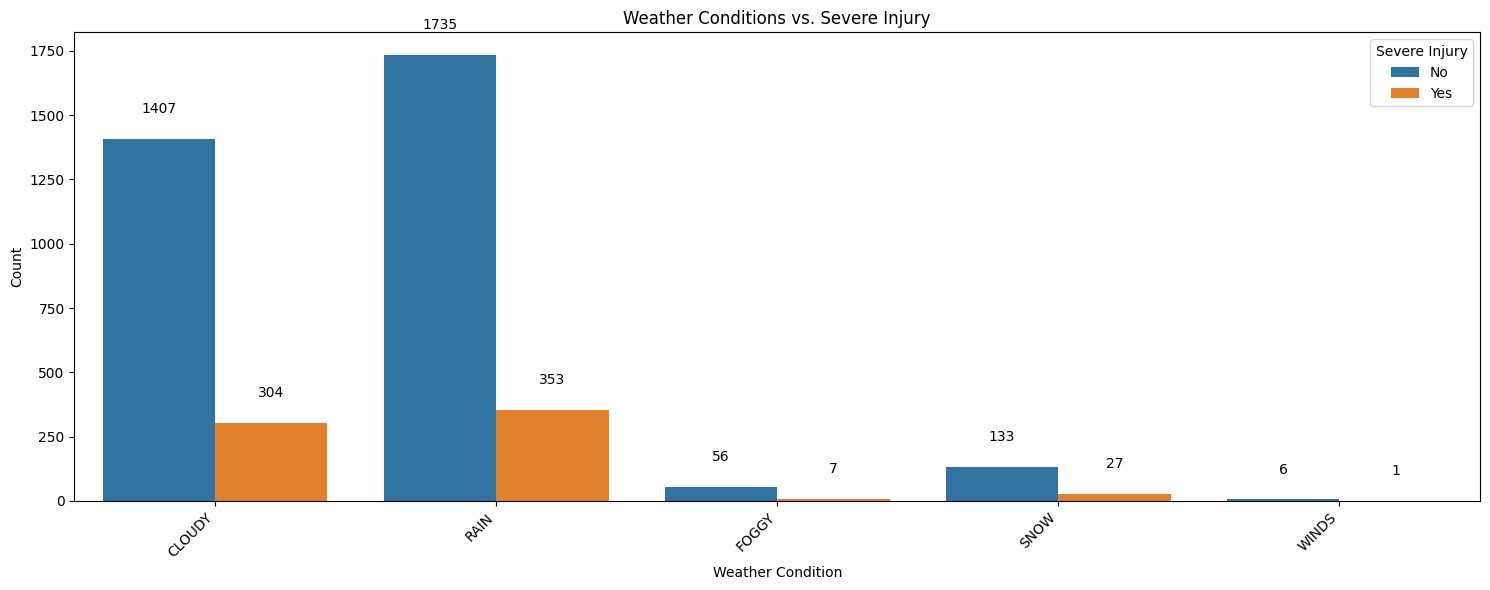

In [ ]:
# prompt: plot for weather exclude CLEAR value versus sever_injury (1,0)

# Filter out 'CLEAR' weather condition
df_filtered = df[df['Weather'] != 'CLEAR']

# Check if 'SEVERE_INJURY' column exists in df_filtered
if 'SEVERE_INJURY' not in df_filtered.columns:
    print("Error: 'SEVERE_INJURY' column not found in filtered DataFrame.")
else:
    # Create the plot
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x='Weather', hue='SEVERE_INJURY', data=df_filtered)
    plt.title('Weather Conditions vs. Severe Injury')
    plt.xlabel('Weather Condition')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Severe Injury', labels=['No', 'Yes'])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                x=p.get_x() + p.get_width() / 2,
                y=height + 100,  # Adjust height position for readability
                s=int(height),
                ha="center"
            )

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

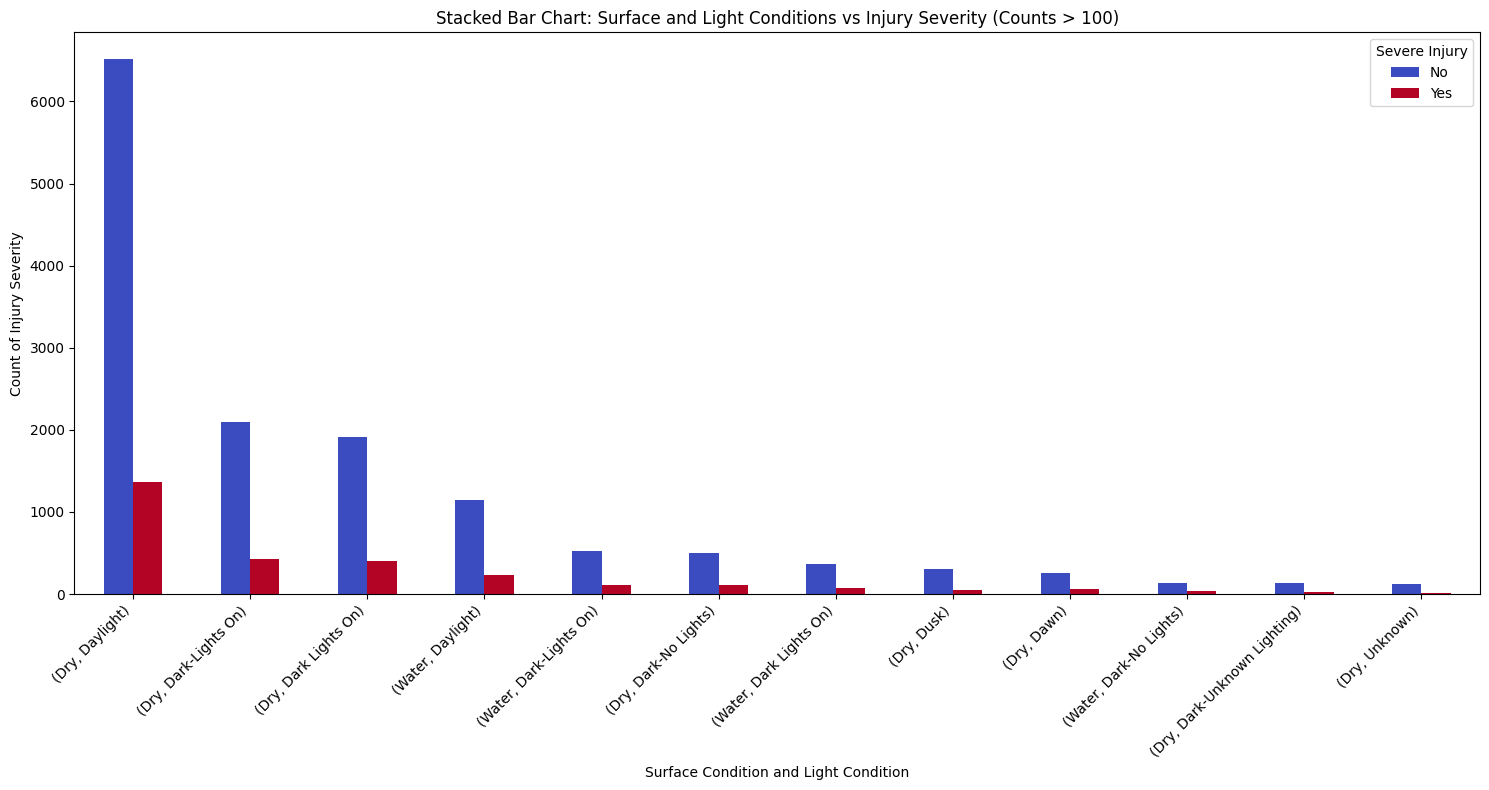

In [ ]:
# Crosstab for Surface Condition, Light Condition, and Injury Severity
surface_light_injury_ct = pd.crosstab(index=[df['Surface Condition'], df['Light']],
                                      columns=df['SEVERE_INJURY'])

# Filter to only include cases with a significant count (e.g., > 100)
# The original value of 1000 was too high and resulted in an empty DataFrame
# Change 1000 to 100 to include more data
filtered_ct = surface_light_injury_ct[surface_light_injury_ct.sum(axis=1) > 100]

# Create a crosstab for Surface Condition, Light Condition, and Injury Severity
surface_light_injury_ct = pd.crosstab(index=[df['Surface Condition'], df['Light']],
                                       columns=df['SEVERE_INJURY'])
# Change 1000 to 100 to include more data
filtered_ct = surface_light_injury_ct[surface_light_injury_ct.sum(axis=1) > 100]

filtered_ct = filtered_ct.loc[filtered_ct.sum(axis=1).sort_values(ascending=False).index]

# Plot the sorted stacked bar chart
filtered_ct.plot(kind='bar', stacked=False, figsize=(15, 8), colormap='coolwarm')
plt.title("Stacked Bar Chart: Surface and Light Conditions vs Injury Severity (Counts > 100)") # Update title
plt.xlabel("Surface Condition and Light Condition")
plt.ylabel("Count of Injury Severity")
plt.legend(title='Severe Injury', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

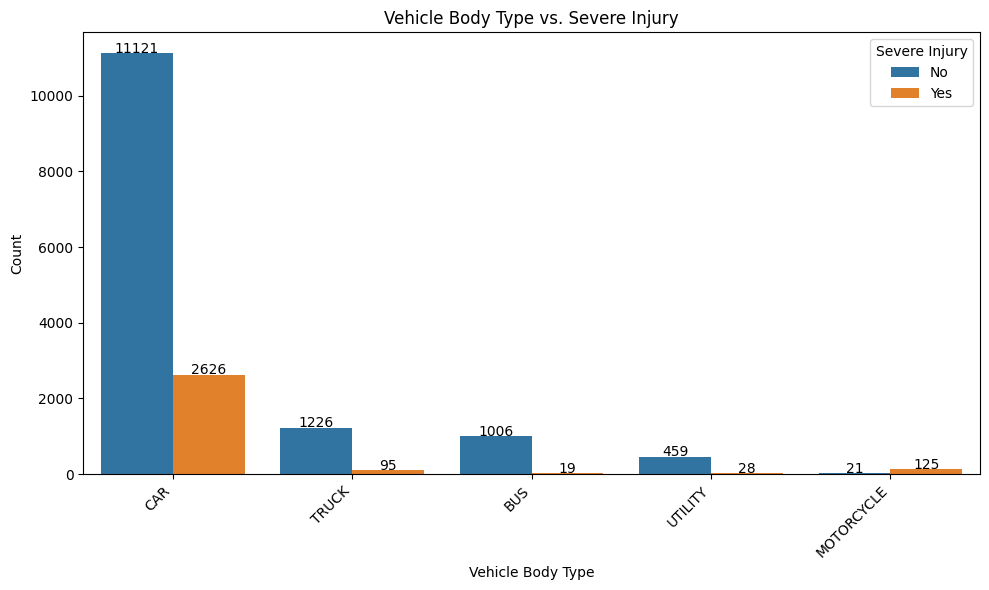

In [ ]:
# prompt: generate chart for Vehicle_Body_Type_Cleaned and Severe_Injury and annote values also limit only top 3 categories in vehicle_body_type_cleaned

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code

# Calculate the counts for the top 3 Vehicle_Body_Type_Cleaned categories
top_3_vehicles = df['Vehicle_Body_Type_Cleaned'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 3 vehicle types
df_top_3 = df[df['Vehicle_Body_Type_Cleaned'].isin(top_3_vehicles)]

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Vehicle_Body_Type_Cleaned', hue='SEVERE_INJURY', data=df_top_3)
plt.title('Vehicle Body Type vs. Severe Injury')
plt.xlabel('Vehicle Body Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severe Injury', labels=['No', 'Yes'])

# Annotate values on the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 10,  # Adjust height position for readability
            s=int(height),
            ha="center"
        )

plt.tight_layout()
plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined

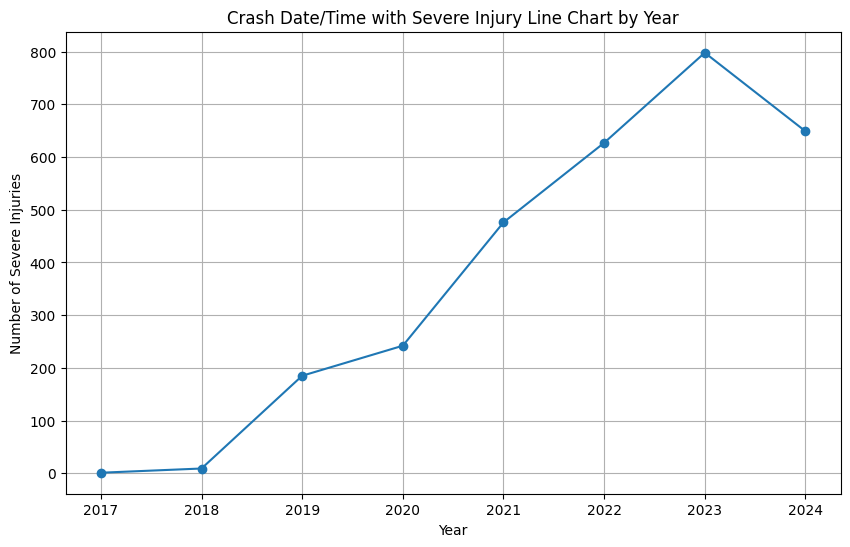

In [ ]:
# prompt: Crash Date/Time with Severe_Injury line chart for year

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has 'Crash Date/Time' and 'SEVERE_INJURY' columns
# and that 'Crash Date/Time' is a datetime object

# Convert 'Crash Date/Time' to datetime if it's not already
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

# Extract the year
df['Year'] = df['Crash Date/Time'].dt.year

# Group by year and sum the severe injuries
severe_injuries_by_year = df.groupby('Year')['SEVERE_INJURY'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(severe_injuries_by_year.index, severe_injuries_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Severe Injuries')
plt.title('Crash Date/Time with Severe Injury Line Chart by Year')
plt.grid(True)
plt.show()

In [ ]:
df.head()

,Crash Date/Time,Weather,Surface Condition,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned,SEVERE_INJURY,Year
6,2023-07-27 12:30:00,CLEAR,Dry,Daylight,NONE,NaN,No,NaN,NOT_DISTRACTED,FUNCTIONAL,9,MOVING CONSTANT SPEED,EAST,30,No,No,2022,CAR,0.0,2023
9,2023-10-16 19:33:00,CLEAR,Dry,Dark-Lights On,NONE,NaN,Yes,NaN,UNKNOWN,DISABLING,1,TURNING LEFT,SOUTH,35,No,No,2021,CAR,0.0,2023
11,2023-10-16 11:10:00,CLEAR,Dry,Daylight,NaN,NaN,Yes,NaN,UNKNOWN,FUNCTIONAL,12,ACCELERATING,EAST,20,No,No,2021,CAR,0.0,2023
13,2023-08-15 18:02:00,CLEAR,Dry,Daylight,NONE,NaN,Yes,NaN,UNKNOWN,OTHER,12,ACCELERATING,SOUTH,35,No,No,2019,CAR,0.0,2023
20,2023-11-08 15:59:00,CLEAR,Dry,Daylight,NONE,NaN,Yes,NaN,UNKNOWN,DISABLING,4,TURNING LEFT,SOUTH,35,No,No,2022,CAR,0.0,2023


In [ ]:
df.head()


,Crash Date/Time,Weather,Surface Condition,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned,SEVERE_INJURY,Year
6,2023-07-27 12:30:00,CLEAR,Dry,Daylight,NONE,NaN,No,NaN,NOT_DISTRACTED,FUNCTIONAL,9,MOVING CONSTANT SPEED,EAST,30,No,No,2022,CAR,0.0,2023
9,2023-10-16 19:33:00,CLEAR,Dry,Dark-Lights On,NONE,NaN,Yes,NaN,UNKNOWN,DISABLING,1,TURNING LEFT,SOUTH,35,No,No,2021,CAR,0.0,2023
11,2023-10-16 11:10:00,CLEAR,Dry,Daylight,NaN,NaN,Yes,NaN,UNKNOWN,FUNCTIONAL,12,ACCELERATING,EAST,20,No,No,2021,CAR,0.0,2023
13,2023-08-15 18:02:00,CLEAR,Dry,Daylight,NONE,NaN,Yes,NaN,UNKNOWN,OTHER,12,ACCELERATING,SOUTH,35,No,No,2019,CAR,0.0,2023
20,2023-11-08 15:59:00,CLEAR,Dry,Daylight,NONE,NaN,Yes,NaN,UNKNOWN,DISABLING,4,TURNING LEFT,SOUTH,35,No,No,2022,CAR,0.0,2023


In [ ]:
df.isnull().sum()

,0
Crash Date/Time,0
Weather,0
Surface Condition,0
Light,0
Driver Substance Abuse,2447
Non-Motorist Substance Abuse,17026
Driver At Fault,0
Circumstance,14379
Driver Distracted By,0
Vehicle Damage Extent,19


In [ ]:
# plt.figure(figsize=(14, 8))
# df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])
# df.set_index('Crash Date/Time').resample('Q').size().plot()
# plt.title("Monthly Crash Counts Over Time")
# plt.xlabel("Date")
# plt.ylabel("Number of Crashes")
# plt.show()

In [ ]:
df.columns

Index(['Crash Date/Time', 'Weather', 'Surface Condition', 'Light',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Circumstance', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle_Body_Type_Cleaned', 'SEVERE_INJURY', 'Year'],
      dtype='object')

# Modeling

## Model-1 (EXternal Factors Weather, Light, Surface condition)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
# prompt: keep only 'Surface Condition', 'Weather', 'Light' , SEVERE_INJURY

# Keep only specified columns
df_1 = df[['Surface Condition', 'Weather', 'Light', 'SEVERE_INJURY']]

print(df_1.head())

   Surface Condition Weather           Light  SEVERE_INJURY
6                Dry   CLEAR        Daylight            0.0
9                Dry   CLEAR  Dark-Lights On            0.0
11               Dry   CLEAR        Daylight            0.0
13               Dry   CLEAR        Daylight            0.0
20               Dry   CLEAR        Daylight            0.0


In [ ]:
df_1.isnull().sum()

,0
Surface Condition,0
Weather,0
Light,0
SEVERE_INJURY,53


In [ ]:
features = ['Surface Condition', 'Weather', 'Light']
df_cat = pd.get_dummies(df_1, columns=features, drop_first=True, dtype = int)

# Display the encoded DataFrame
df_cat.head()

,SEVERE_INJURY,Surface Condition_Oil,Surface Condition_Sand,Surface Condition_Snow,Surface Condition_Unknown,Surface Condition_Water,Weather_CLOUDY,Weather_FOGGY,Weather_RAIN,Weather_SNOW,Weather_WINDS,Light_Dark-Lights On,Light_Dark-No Lights,Light_Dark-Unknown Lighting,Light_Dawn,Light_Daylight,Light_Dusk,Light_Unknown
6,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
11,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
20,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# prompt: SMOTE

# from imblearn.over_sampling import SMOTE

# # Separate features (X) and target variable (y)
# X = df_cat.drop('SEVERE_INJURY', axis=1)
# y = df_cat['SEVERE_INJURY']

# # Initialize SMOTE
# smote = SMOTE(random_state=42)

# # Apply SMOTE to oversample the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Create a new DataFrame with the resampled data
# df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
# df_resampled['SEVERE_INJURY'] = y_resampled

In [ ]:

# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(
#     df_resampled.drop('SEVERE_INJURY', axis=1),
#     df_resampled['SEVERE_INJURY'],
#     test_size=0.3,  # Adjust test_size as needed
#     random_state=42  # Set random_state for reproducibility
# )

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

q1_X = df_cat.drop(columns=["SEVERE_INJURY"])
q1_X = sm.add_constant(q1_X)
q1_y = df_cat[["SEVERE_INJURY"]]


X_train, X_test, y_train, y_test = train_test_split(q1_X, q1_y, test_size=0.3, random_state=42)




# Fit the logistic regression model
model = sm.Logit(q1_y, q1_X)
result = model.fit()

ValueError: endog must be in the unit interval.

In [ ]:
print(result.summary())

In [ ]:
# prompt: remove P>|z| for anything more than 0.05 for above code

import numpy as np
import pandas as pd
import statsmodels.api as sm

# ... (Your existing code) ...

# Fit the logistic regression model
model = sm.Logit(q1_y, q1_X)
result = model.fit()

# Access the p-values from the summary
p_values = result.pvalues

# Create a list to store the significant features
significant_features = []

# Filter out features with p-values > 0.05
for feature, p_value in p_values.items():
  if p_value <= 0.05:
    significant_features.append(feature)

# Remove the constant if present
if 'const' in significant_features:
    significant_features.remove('const')

# Refit the model with only the significant features
X_significant = q1_X[significant_features]
model_significant = sm.Logit(q1_y, X_significant)
result_significant = model_significant.fit()

print(result_significant.summary())

In [ ]:
# prompt: randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
# prompt: decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

## Model -2 (Internal Factor Vehicle Type, Model)

In [ ]:
df.columns

In [ ]:

df_2 = df[['Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Movement',
        'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle Year', 'Vehicle_Body_Type_Cleaned', 'SEVERE_INJURY']]
(df_2.head())


In [ ]:

# Replace 'UNKNOWN' with NaN for relevant columns before filling
for col in df_2.columns:
    df_2[col].replace('UNKNOWN', np.nan, inplace=True)
    df_2[col].replace('Other', np.nan, inplace=True) # added this line

# Forward fill NaN values
for col in df_2.columns:
    df_2[col].fillna(method='ffill', inplace=True)

# ... (Rest of your code)

In [ ]:
df_2.isnull().sum()

In [ ]:
df_2.dropna(inplace=True)

In [ ]:
features = ['Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Movement', 'Driverless Vehicle', 'Parked Vehicle',
       'Vehicle_Body_Type_Cleaned']
df_cat = pd.get_dummies(df_2, columns=features, drop_first=True, dtype = int)

# Display the encoded DataFrame
df_cat.head()

In [ ]:
df_cat.shape

In [ ]:
q1_X = df_cat.drop(columns=["SEVERE_INJURY"])
q1_X = sm.add_constant(q1_X)
q1_y = df_cat[["SEVERE_INJURY"]]

# Fit the logistic regression model
# Add a regularization method to the fit function to handle multicollinearity
model = sm.Logit(q1_y, q1_X)
# Try using the 'l1' or 'bfgs' solvers for regularization
# Consider adjusting the maxiter argument if the model fails to converge
# result = model.fit_regularized(method='l1', maxiter=1000)
result = model.fit() # Alternative solver option
#result = model.fit(method='bfgs', maxiter=1000) # Alternative solver option
print(result.summary())

In [ ]:
q1_X = df_cat.drop(columns=["SEVERE_INJURY","Vehicle Year", "Vehicle First Impact Location_4", "Vehicle First Impact Location_5",
                            "Vehicle Movement_LEAVING TRAFFIC LANE", "Vehicle Movement_STOPPED IN TRAFFIC LANE", "Vehicle Movement_NEGOTIATING A CURVE",
                           "Vehicle Movement_DRIVERLESS MOVING VEHICLE", "Vehicle Movement_ENTERING TRAFFIC LANE",  "Parked Vehicle_Yes",
                            "Vehicle Movement_STARTING FROM LANE", "Vehicle Movement_OTHER", "Vehicle Movement_STOPPED IN TRAFFIC",
                            "Vehicle Movement_MAKING U-TURN"])
q1_X = sm.add_constant(q1_X)
q1_y = df_cat[["SEVERE_INJURY"]]

# Fit the logistic regression model
# Add a regularization method to the fit function to handle multicollinearity
model = sm.Logit(q1_y, q1_X)
# Try using the 'l1' or 'bfgs' solvers for regularization
# Consider adjusting the maxiter argument if the model fails to converge
# result = model.fit_regularized(method='l1', maxiter=1000)
result = model.fit() # Alternative solver option
#result = model.fit(method='bfgs', maxiter=1000) # Alternative solver option
print(result.summary())

At 5% Significance level, below variable are not significant,

*   Vehicle Year
*   Parked Vehicle_Yes
*   Vehicle First Impact Location_4
*   Vehicle First Impact Location_5
*   Vehicle Movement_LEAVING TRAFFIC LANE
*   Vehicle Movement_STOPPED IN TRAFFIC LANE
*   Vehicle Movement_NEGOTIATING A CURVE
*   Vehicle Movement_DRIVERLESS MOVING VEHICLE
*   Vehicle Movement_ENTERING TRAFFIC LANE
*   Vehicle Movement_STARTING FROM LANE
*   Vehicle Movement_OTHER
*   Vehicle Movement_MAKING U-TURN

In conclusion, the variables like Vehicle year, whether Parked Vehicle or not, Vehicle impacted between 4 AM and 5 AM and Vehichle movements like entering, leaving or stopping traffic lane, making an U-Turn are not making significant impact on severity of collision.



In [ ]:
X_new = X.drop(["Vehicle_Body_Type_Cleaned_PASSENGER CAR","ACRS Report Type_Property Damage Crash", "Vehicle Year"], axis = 1)

In [ ]:
# prompt: vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_new.columns
vif_data["VIF"] = [variance_inflation_factor(X_new.values, i) for i in range(len(X_new.columns))]

# Display VIF values
vif_data

In [ ]:
vif_data.sort_values(by='VIF', ascending=False)

In [ ]:
# prompt: get feature importance of logreg

# Get feature importance from coefficients
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(logreg.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(20)

In [ ]:
# prompt: randomforestclassifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)  # Set random_state for reproducibility
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
# prompt: decisiontreeclassifier

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

## Model - 3 (Driver Behavior)


In [ ]:
df.columns

Index(['Crash Date/Time', 'Weather', 'Surface Condition', 'Light',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse',
       'Driver At Fault', 'Circumstance', 'Driver Distracted By',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle_Body_Type_Cleaned', 'SEVERE_INJURY', 'Year'],
      dtype='object')

In [ ]:
df4 = df[['Driver Substance Abuse', 'Driver At Fault', 'Driver Distracted By', 'SEVERE_INJURY' ]]

In [ ]:
df4.isna().sum()

,0
Driver Substance Abuse,2447
Driver At Fault,0
Driver Distracted By,0
SEVERE_INJURY,53


In [ ]:
df4.dropna(inplace=True)

<ipython-input-131-245837dc34b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.dropna(inplace=True)


In [ ]:
print(df4.shape)
df4.head()

(14973, 4)


,Driver Substance Abuse,Driver At Fault,Driver Distracted By,SEVERE_INJURY
6,NONE,No,NOT_DISTRACTED,0.0
9,NONE,Yes,UNKNOWN,0.0
13,NONE,Yes,UNKNOWN,0.0
20,NONE,Yes,UNKNOWN,0.0
26,NONE,Yes,UNKNOWN,0.0


In [ ]:
# one hot encoding

df4 = pd.get_dummies(df4, drop_first=True, dtype = int)

df4.head()




,SEVERE_INJURY,Driver Substance Abuse_ALCOHOL&DRUG,Driver Substance Abuse_DRUG,Driver Substance Abuse_NONE,Driver At Fault_Unknown,Driver At Fault_Yes,Driver Distracted By_EATING,Driver Distracted By_NOT_DISTRACTED,Driver Distracted By_OTHER PASSENGERS,Driver Distracted By_SMOKING,Driver Distracted By_UNKNOWN
6,0.0,0,0,1,0,0,0,1,0,0,0
9,0.0,0,0,1,0,1,0,0,0,0,1
13,0.0,0,0,1,0,1,0,0,0,0,1
20,0.0,0,0,1,0,1,0,0,0,0,1
26,0.0,0,0,1,0,1,0,0,0,0,1


In [ ]:
q4_X = df4.drop(columns=["SEVERE_INJURY"])
q4_X = sm.add_constant(q4_X)
q4_y = df4[["SEVERE_INJURY"]]

model = sm.Logit(q4_y, q4_X)
result = model.fit()
print(result.summary())

         Current function value: 0.460898
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          SEVERE_INJURY   No. Observations:                14973
Model:                          Logit   Df Residuals:                    14962
Method:                           MLE   Df Model:                           10
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                0.005594
Time:                        03:42:13   Log-Likelihood:                -6901.0
converged:                      False   LL-Null:                       -6939.8
Covariance Type:            nonrobust   LLR p-value:                 1.457e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.1093      0.391     -2.835      0.005      -1.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
q4_X = df4.drop(columns=["SEVERE_INJURY", "Driver Substance Abuse_NONE", 'Driver Distracted By_EATING',
                         'Driver Distracted By_NOT_DISTRACTED', 'Driver Distracted By_SMOKING',
                         "Driver Distracted By_OTHER PASSENGERS", 'Driver Distracted By_UNKNOWN'])
q4_X = sm.add_constant(q4_X)
q4_y = df4[["SEVERE_INJURY"]]

model = sm.Logit(q4_y, q4_X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.461137
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          SEVERE_INJURY   No. Observations:                14973
Model:                          Logit   Df Residuals:                    14968
Method:                           MLE   Df Model:                            4
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                0.005078
Time:                        03:42:13   Log-Likelihood:                -6904.6
converged:                       True   LL-Null:                       -6939.8
Covariance Type:            nonrobust   LLR p-value:                 1.799e-14
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4175      0.028 

At 5% Significance level, below variable are not significant,

*   Driver Distracted By

"Driver Distracted By" has been feature engineered by reducing number of categories to 6 (NONE, EATING, SMOKING, OTHER PASSENGERS, UNKNOWN).


In [ ]:
# prompt: export df4

from google.colab import files
df4.to_csv('df4.csv', encoding = 'utf-8-sig')
files.download('df4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('cleaned_crash_data.csv')

In [21]:
# prompt: crosstab values betweek Speed Limit and Severe_Injury

import pandas as pd

# Assuming your dataframe is named 'df'
pd.crosstab(df['Speed Limit'], df['SEVERE_INJURY'])

SEVERE_INJURY,0.0,1.0
Speed Limit,,
0,4937,429
5,3739,206
10,2753,200
15,5519,433
20,1137,159
25,21710,3559
30,20399,4637
35,43851,10425
40,27106,7899


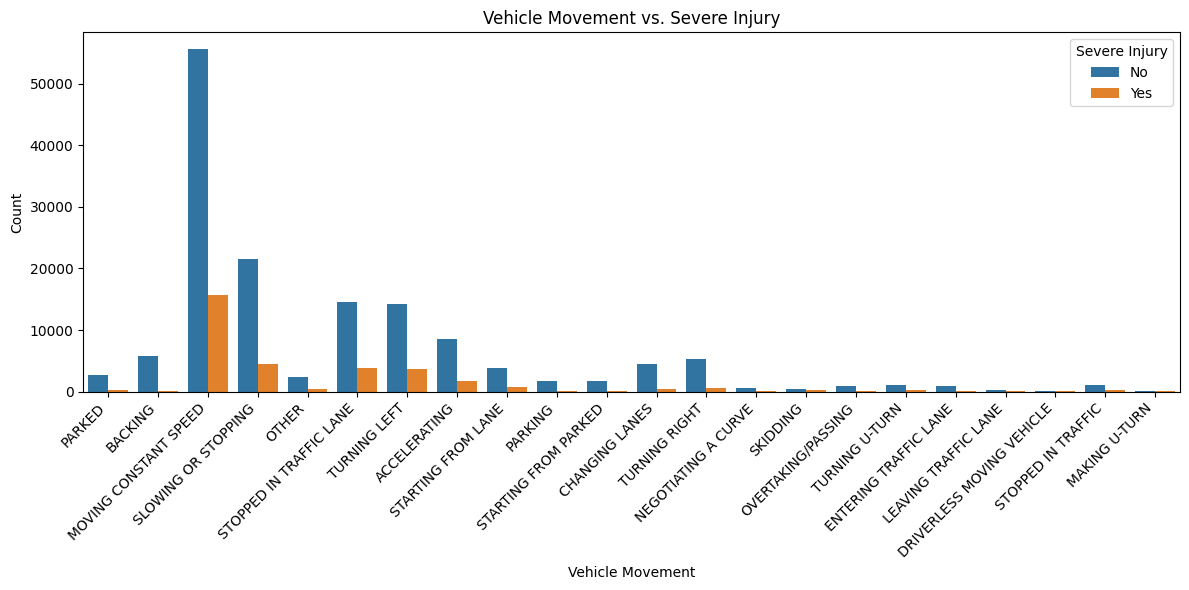

In [24]:
# prompt: plot bar chart for Vehicle Movement versus Severe_Injury

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has 'Vehicle Movement' and 'SEVERE_INJURY' columns

plt.figure(figsize=(12, 6))
sns.countplot(x='Vehicle Movement', hue='SEVERE_INJURY', data=df)
plt.title('Vehicle Movement vs. Severe Injury')
plt.xlabel('Vehicle Movement')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Severe Injury', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [6]:
df.head()

,Unnamed: 0,Weather,Surface Condition,Light,Driver Substance Abuse,Non-Motorist Substance Abuse,Driver At Fault,Circumstance,Driver Distracted By,Vehicle Damage Extent,Vehicle First Impact Location,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle_Body_Type_Cleaned,SEVERE_INJURY
0,0,CLEAR,NaN,Daylight,NONE DETECTED,NaN,No,NaN,UNKNOWN,SUPERFICIAL,1.0,PARKED,NaN,0,No,Yes,2017,OTHER,0.0
1,2,CLEAR,NaN,Daylight,NaN,NaN,Yes,NaN,NOT DISTRACTED,NO DAMAGE,6.0,BACKING,WEST,15,No,No,2015,PASSENGER CAR,0.0
2,4,CLEAR,Dry,Dark-Lights On,NaN,NaN,No,NaN,NOT DISTRACTED,DISABLING,12.0,MOVING CONSTANT SPEED,SOUTH,35,No,No,2017,PASSENGER CAR,0.0
3,5,CLOUDY,Dry,Daylight,NONE DETECTED,NaN,No,NaN,NOT DISTRACTED,FUNCTIONAL,6.0,SLOWING OR STOPPING,EAST,30,No,No,2010,SUV,0.0
4,6,CLEAR,Dry,Daylight,NONE DETECTED,NaN,No,NaN,NOT DISTRACTED,FUNCTIONAL,9.0,MOVING CONSTANT SPEED,EAST,30,No,No,2022,PASSENGER CAR,0.0


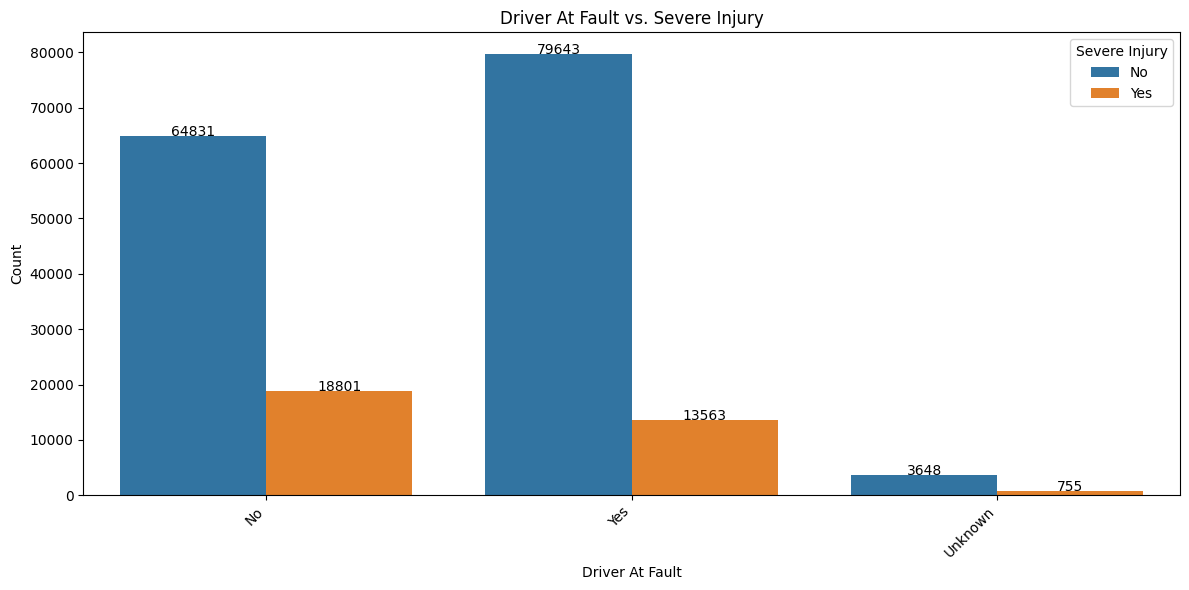

In [27]:
# prompt: plot for Driver At Fault versus Severe_Injury and annote value

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has 'Driver At Fault' and 'SEVERE_INJURY' columns

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Driver At Fault', hue='SEVERE_INJURY', data=df)
plt.title('Driver At Fault vs. Severe Injury')
plt.xlabel('Driver At Fault')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Severe Injury', labels=['No', 'Yes'])

# Annotate values on the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 10,  # Adjust height position for readability
            s=int(height),
            ha="center"
        )

plt.tight_layout()
plt.show()

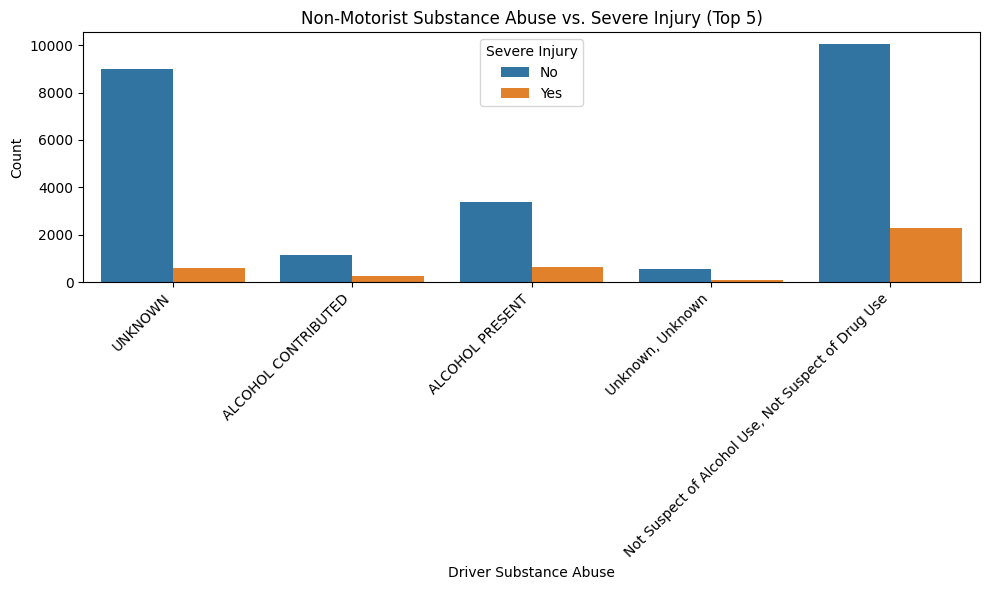

In [15]:
 # prompt: plot Non-Motorist Substance Abuse versus Severe_Injury and filter none detected and include top 5 plot only

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it has the necessary columns
# Filter out rows where 'Driver Substance Abuse' is 'NONE DETECTED'
df_filtered = df[df['Driver Substance Abuse'] != 'NONE DETECTED']

# Group the data and get the top 5 'Driver Substance Abuse' categories by count
top_5_substances = df_filtered['Driver Substance Abuse'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 substances
df_top_5 = df_filtered[df_filtered['Driver Substance Abuse'].isin(top_5_substances)]

# Create the plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Driver Substance Abuse', hue='SEVERE_INJURY', data=df_top_5)
plt.title('Non-Motorist Substance Abuse vs. Severe Injury (Top 5)')
plt.xlabel('Driver Substance Abuse')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Severe Injury', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()